# Supervised Learning: Winsconsin Diagnostic Breast Cancer (WDBC) dataset

In [1]:
## Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.image as mpl
import scipy
import sklearn

In [2]:
#Load dataset 
Cancer = pd.read_csv(r"C:\Users\Ramatu's PC\Desktop\430pm\Cancerdata.csv")


In [3]:
# drop the ID column
Cancer.drop(['id'], axis=1, inplace = True)

In [4]:
#View the first five rows
Cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Exploratory Analysis

In [5]:
#strip() takes out leading and trailing spaces
Cancer.columns.str.strip()

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
Cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [7]:
# New dataframe with only features of means
MeansOnly = Cancer[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','diagnosis']]

In [8]:
#  New dataframe with only features of standard error
seOnly = Cancer[['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se','diagnosis']]

In [9]:
# New dataframe with only features of the worst means (mean of largest 3)
worstMeans = Cancer[['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst','diagnosis']]

In [10]:
#View the first 5 rows of the dataframe
MeansOnly.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,M


In [11]:
#get the values count of the binary column
Cancer["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [12]:
# Statistical description of the columns in the dataframe
Cancer.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


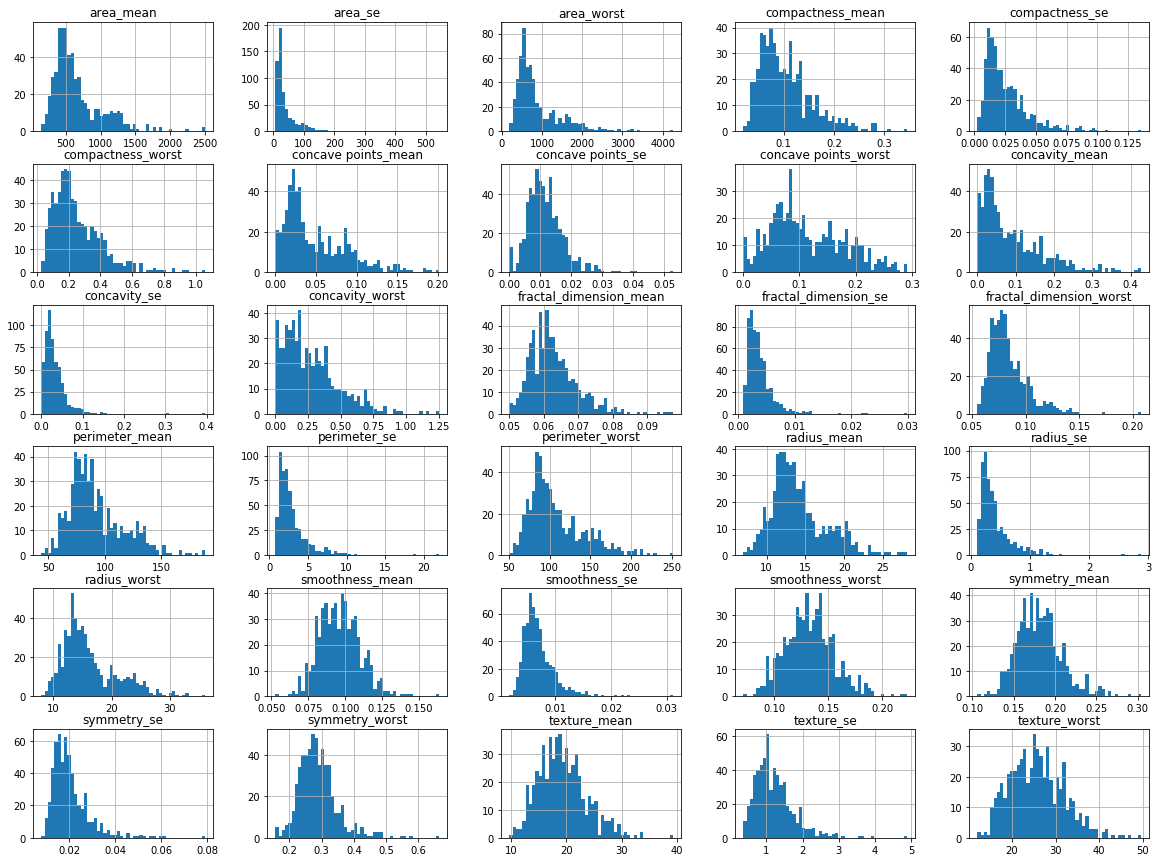

In [13]:
#plot an Histogram showing the destribution of each feacture
Cancer.hist(bins=50, figsize=(20,15))
plt.show()

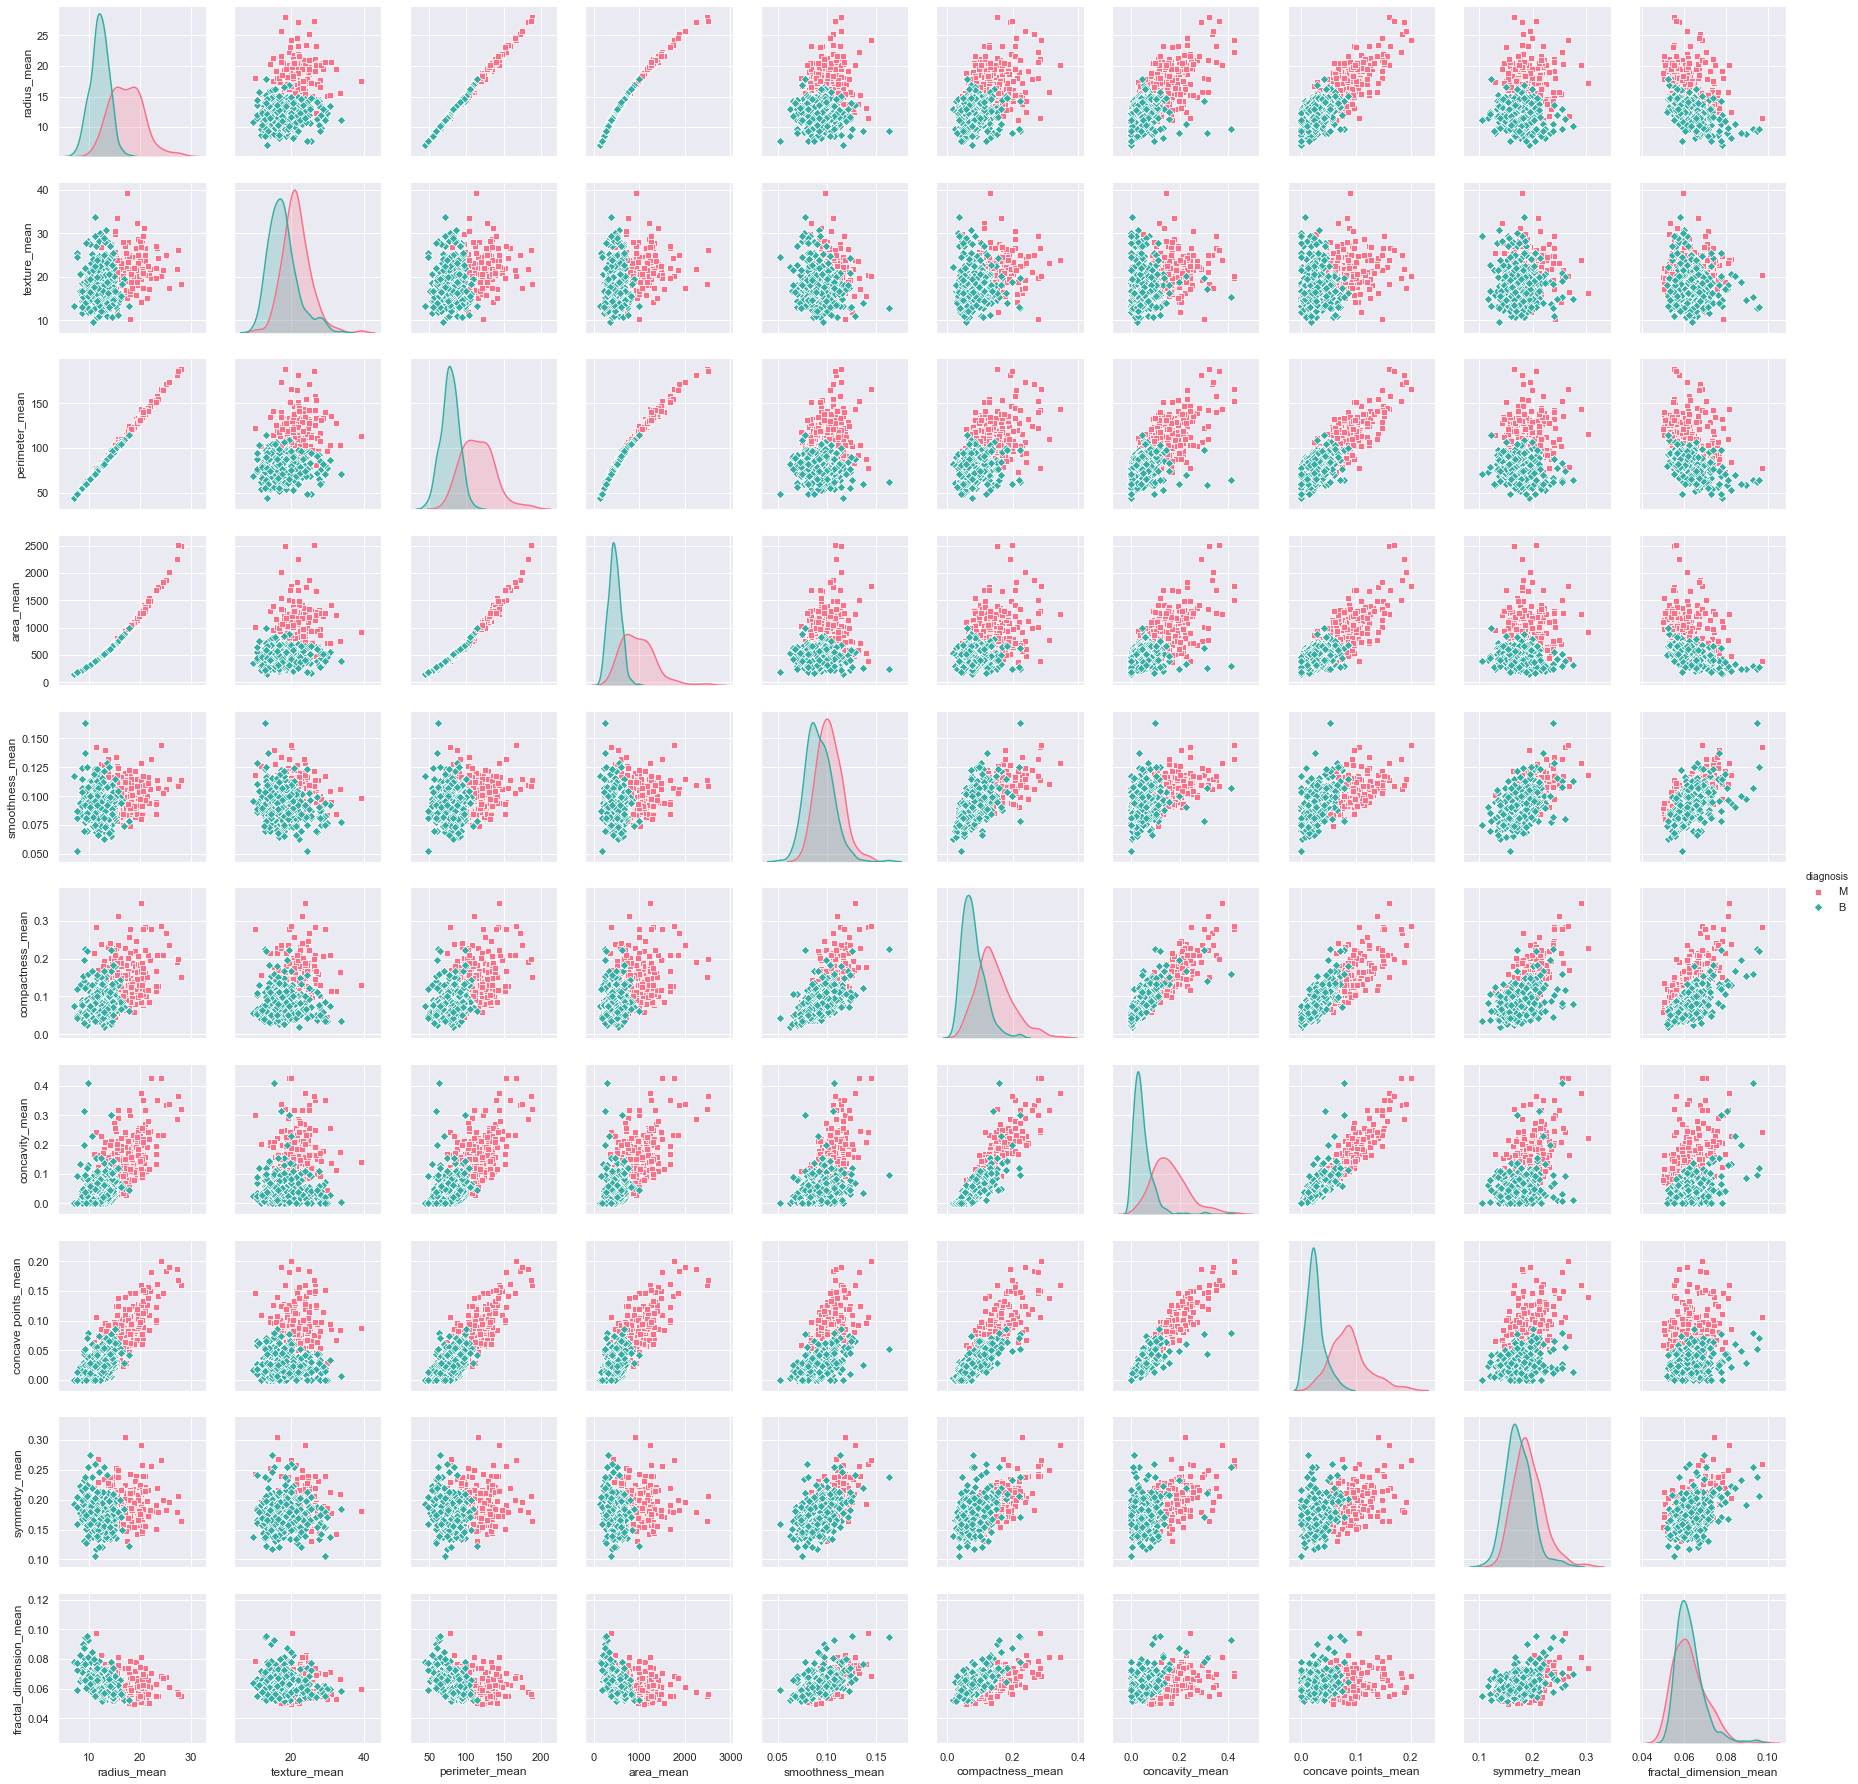

In [14]:
#plot graph showing correlation in the means only dataframe
sns.set()
sns.pairplot(data=MeansOnly, hue='diagnosis',markers=["s", "D"], palette="husl")

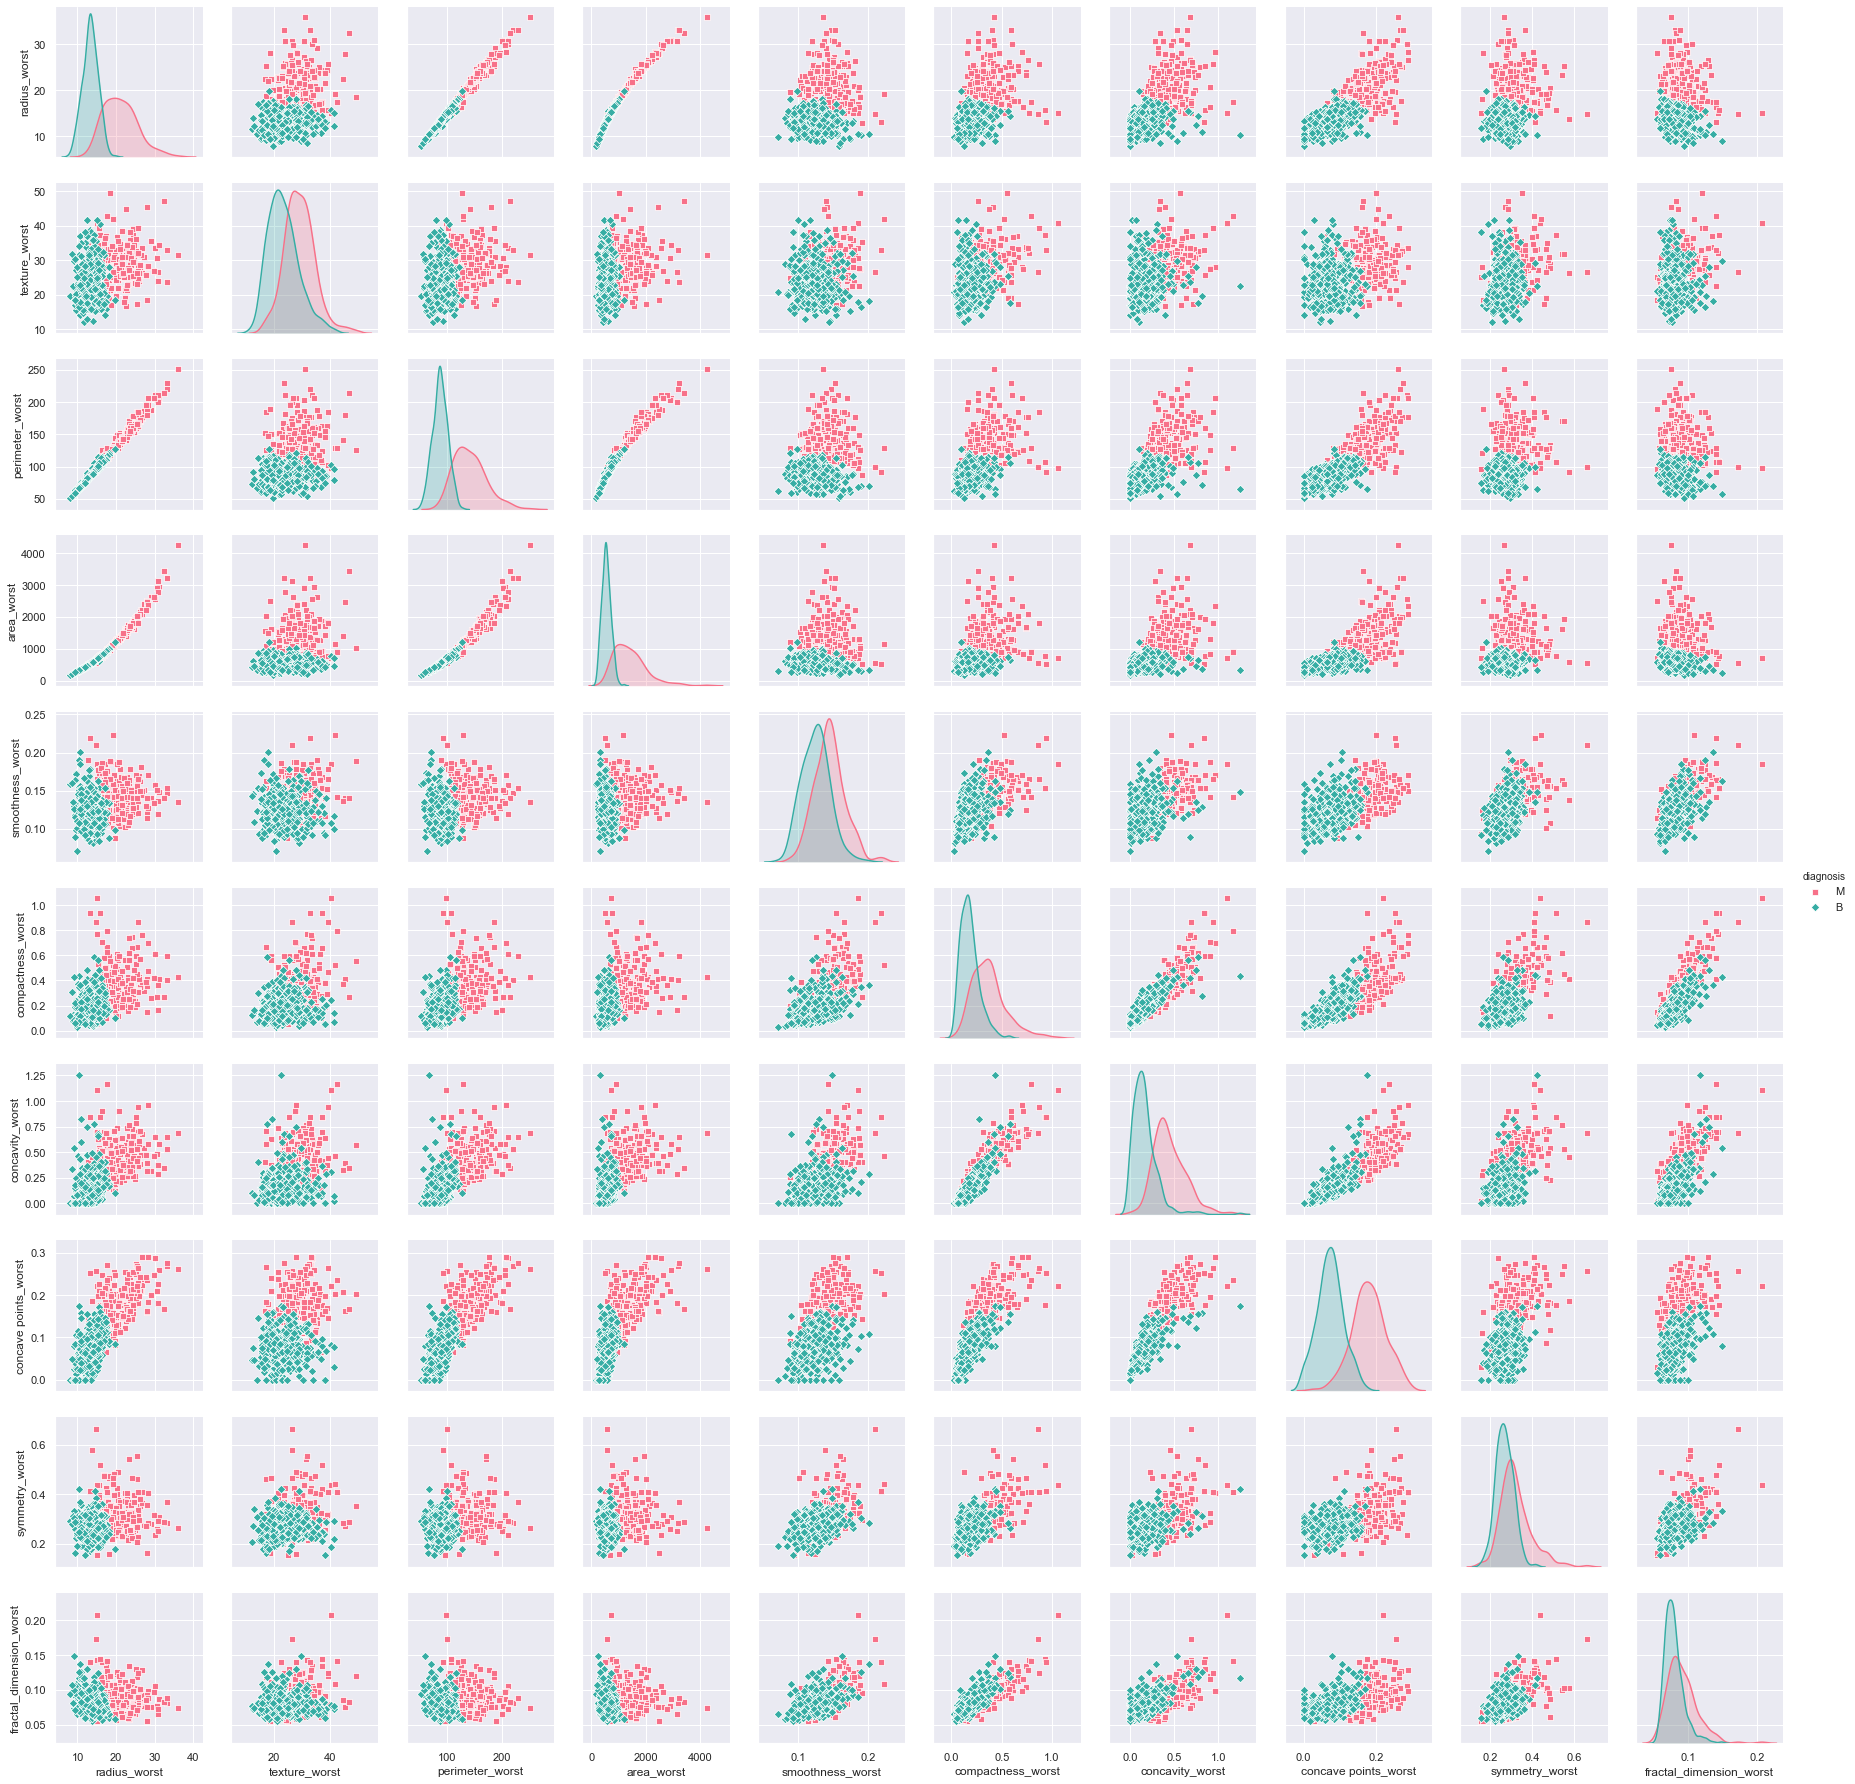

In [15]:
#plot graph showing correlation in the worst-meann only dataframe
sns.pairplot(data=worstMeans , hue='diagnosis',markers=["s", "D"], palette="husl")

In [16]:
#Build the correlation table
corr = Cancer.corr()

In [17]:
#show the correlation table
corr


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


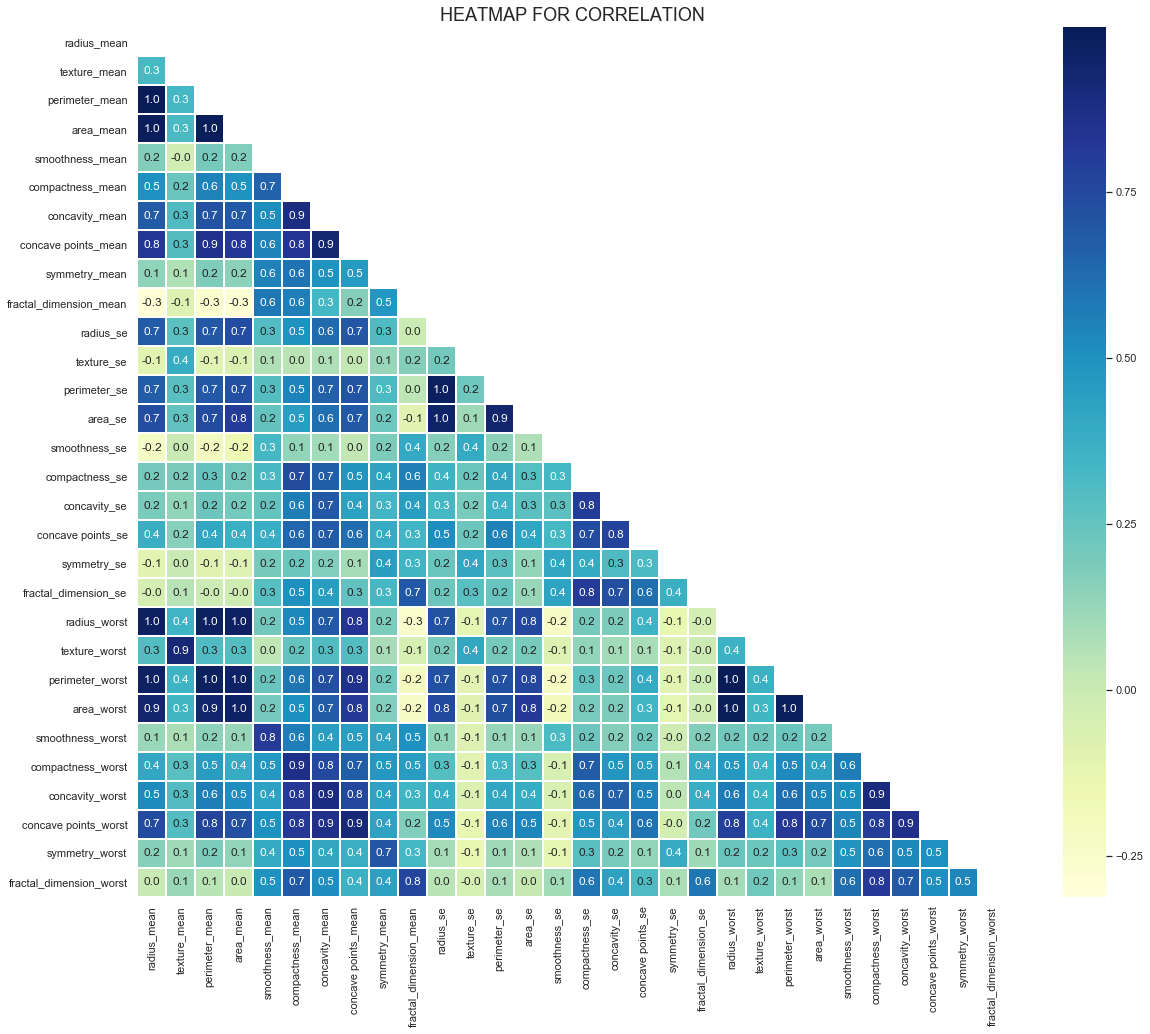

In [18]:
#Visual representation of the correlation matrix ------Heatmap--------
corr = corr [corr < 1] ## To avoid getting correlation of variable with themselves i.e value of 1 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f,ax = plt.subplots(figsize=(20, 16))
sns.heatmap(corr, cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="YlGnBu", linewidths=.5, mask = mask, ax=ax)
plt.title('HEATMAP FOR CORRELATION', size=18);



In [19]:
#Encode the Categorical column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Diagnosis = Cancer["diagnosis"]
Diagnosis_encoded = encoder.fit_transform(Diagnosis)
Cancer["diagnosis"]=Diagnosis_encoded

In [20]:
print(Cancer.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


# Predictive Analysis

In [21]:
# Seperate the y from the x columns
X = Cancer.drop('diagnosis',axis=1)
Y = Cancer['diagnosis']

from sklearn.model_selection import train_test_split
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.25, random_state=1)
print('--------------- Split-out dataset [Done]')

--------------- Split-out dataset [Done]


Feature Selection

In [22]:
#Feature Selection ---------Method 1----------
#filter based method ----CHI SQUARED----------

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import  chi2
from sklearn.preprocessing import MinMaxScaler

X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k = 15) # default is k=10 but i want top 16
chi_selector.fit(X_norm, Y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')


15 selected features


In [23]:
#Feature Selection -------------------Method 2--------------------
#wrapper based method ----Reccursive feature elimination----------

import warnings
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category = ConvergenceWarning)
rfe_selector = RFE(estimator=LogisticRegression(solver='lbfgs'), n_features_to_select=15, step=10, verbose=5)
rfe_selector.fit(X_norm, Y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 30 features.
Fitting estimator with 20 features.
15 selected features


In [24]:
#Feature Selection -------------------Method 3--------------------
#embedded method --------------lasso :selectFromModel-------------
import warnings
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(estimator = LogisticRegression(penalty="l2",solver='lbfgs'), max_features=18)
embeded_lr_selector.fit(X_norm, Y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

15 selected features


In [25]:
# put all selection together
feature_selection_ = pd.DataFrame({'Feature':X.columns,'Chi-2':chi_support,'RFE':rfe_support,  'Logistics':embeded_lr_support})
# count the selected times for each feature
feature_selection_['Total'] = np.sum(feature_selection_, axis=1)
# display all 30
feature_selection_ = feature_selection_.sort_values(['Total','Feature'] , ascending=False)
feature_selection_.index = range(1, len(feature_selection_)+1)
feature_selection_

,Feature,Chi-2,RFE,Logistics,Total
1,radius_worst,True,True,True,3
2,radius_se,True,True,True,3
3,radius_mean,True,True,True,3
4,perimeter_worst,True,True,True,3
5,perimeter_mean,True,True,True,3
6,concavity_worst,True,True,True,3
7,concavity_mean,True,True,True,3
8,concave points_worst,True,True,True,3
9,concave points_mean,True,True,True,3
10,area_worst,True,True,True,3


In [26]:
# Chosing top 15 features from the feature selection dataframe
Cancer_fs = Cancer[['radius_worst', 'radius_se', 'radius_mean', 'perimeter_worst', 'perimeter_mean','concavity_worst', 'concavity_mean', 
              'concave points_worst',  'concave points_mean', 'area_worst', 'area_mean', 'texture_worst', 'texture_mean',
              'symmetry_worst', 'smoothness_worst', 'diagnosis' ]]
Cancer_fs.head()

,radius_worst,radius_se,radius_mean,perimeter_worst,perimeter_mean,concavity_worst,concavity_mean,concave points_worst,concave points_mean,area_worst,area_mean,texture_worst,texture_mean,symmetry_worst,smoothness_worst,diagnosis
0,25.38,1.0950,17.99,184.60,122.80,0.7119,0.3001,0.2654,0.14710,2019.0,1001.0,17.33,10.38,0.4601,0.1622,1
1,24.99,0.5435,20.57,158.80,132.90,0.2416,0.0869,0.1860,0.07017,1956.0,1326.0,23.41,17.77,0.2750,0.1238,1
2,23.57,0.7456,19.69,152.50,130.00,0.4504,0.1974,0.2430,0.12790,1709.0,1203.0,25.53,21.25,0.3613,0.1444,1
3,14.91,0.4956,11.42,98.87,77.58,0.6869,0.2414,0.2575,0.10520,567.7,386.1,26.50,20.38,0.6638,0.2098,1
4,22.54,0.7572,20.29,152.20,135.10,0.4000,0.1980,0.1625,0.10430,1575.0,1297.0,16.67,14.34,0.2364,0.1374,1


In [27]:
# Seperate the y from the x columns from selected features
X_fs = Cancer_fs.drop('diagnosis',axis=1)
Y_fs = Cancer_fs['diagnosis']

from sklearn.model_selection import train_test_split
X_train_fs, X_test_fs, Y_train_fs, Y_test_fs = train_test_split(X_fs, Y_fs, test_size=0.25, random_state=1)
print('--------------- Split-out dataset [Done]')

--------------- Split-out dataset [Done]


In [28]:
#comparing the new size of the feature selected dataframe to the original--------training set only------
print("X_train.shape: {}".format(X_train.shape))
print("X_train_fs.shape: {}".format(X_train_fs.shape))

X_train.shape: (426, 30)
X_train_fs.shape: (426, 15)


Desicision Tree Classifier

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from time import time
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#build a classifier
clf_fs = DecisionTreeClassifier(random_state=0)

#scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_fs.astype(np.float64))
X_test_scaled = scaler.transform(X_test_fs.astype(np.float64))
clf_fs.fit(X_train_scaled, Y_train_fs)

y_pred_fs = clf_fs.predict(X_test_scaled)

print("Accuracy: {:.3f}".format(accuracy_score(y_pred_fs, Y_test_fs)))

scores_cv_fs = cross_val_score(clf_fs, X_train_scaled, Y_train_fs, cv=5)
print("mean: {:.3f} (std: {:.3f})".format(scores_cv_fs.mean(),
                                          scores_cv_fs.std()),
                                          end="\n\n" )

print('Misclassified examples: %d' % (Y_test_fs != y_pred_fs).sum())
print('Misclassification rate: %.3f' % ((Y_test_fs != y_pred_fs).sum()/y_pred_fs.sum()) + ' %')
print("Test set Accuracy: {:.3f}".format(clf_fs.score(X_test_scaled, Y_test_fs)))
print("Training set Accuracy: {:.3f}".format(clf_fs.score(X_train_scaled, Y_train_fs)))
print('--------------- DecisionTreeClassifier --No Parameter specification-- : classifier.fit [Done]')

Accuracy: 0.930
mean: 0.951 (std: 0.011)

Misclassified examples: 10
Misclassification rate: 0.196 %
Test set Accuracy: 0.930
Training set Accuracy: 1.000
--------------- DecisionTreeClassifier --No Parameter specification-- : classifier.fit [Done]


In [61]:
#View the decision tree -----------Before Pruning-----------

import os
import graphviz
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r'\library\bin\graphviz'

from IPython.display import Image
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

from sklearn.tree import DecisionTreeClassifier, tree
tree_graph = tree.DecisionTreeClassifier(random_state=0)

tree_graph.fit(X_train_fs, Y_train_fs)

dot_data = export_graphviz(tree_graph, class_names= ['Malignant', 'Benign'], feature_names = ['radius_worst', 'radius_se', 'radius_mean', 'perimeter_worst', 'perimeter_mean','concavity_worst', 'concavity_mean', 
              'concave points_worst',  'concave points_mean', 'area_worst', 'area_mean', 'texture_worst', 'texture_mean',
              'symmetry_worst', 'smoothness_worst'],rounded=True, filled=True, out_file = None)

graph = graph_from_dot_data(dot_data)
graph.write_png('Before_Pruning.png')

True

In [60]:
#view classification report and confusion matrix
print ("----------------------> [DecisionTreeClassifier]")
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test_fs,y_pred_fs))
print(classification_report(Y_test_fs,y_pred_fs))



----------------------> [DecisionTreeClassifier]
[[85  3]
 [ 7 48]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        88
           1       0.94      0.87      0.91        55

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.93       143
weighted avg       0.93      0.93      0.93       143



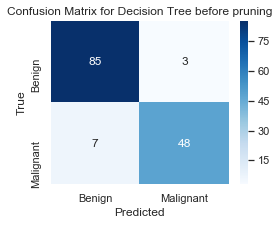

In [32]:
#plot of confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4,3))
cm =confusion_matrix(Y_test_fs, y_pred_fs)
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Benign', 'Malignant'], 
            yticklabels = ['Benign', 'Malignant'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix for Decision Tree before pruning");

In [56]:
#prunning----Parameter Selection: The tree will be pruned with the highest ranking parameters---------
# Ranks parameters combination and assigns 3 rankings based on validation score
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


#specify parameters and distributions to sample from 
param_dist = {"max_depth": [3, None], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]} 
#run randomized search
n_iter_search = 100
random_search = RandomizedSearchCV(clf_fs, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv = 10, iid = False)

start = time()
random_search.fit(X_fs, Y_fs)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)


RandomizedSearchCV took 11.00 seconds for 100 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.954 (std: 0.024)
Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 2}

Model with rank: 2
Mean validation score: 0.954 (std: 0.022)
Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 8}

Model with rank: 3
Mean validation score: 0.951 (std: 0.029)
Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 7}



In [57]:
# test the best parameters
from sklearn.metrics import accuracy_score
print("\n\n-- Testing best parameters [Random]...")

clf_fs_p = DecisionTreeClassifier(criterion= 'entropy', max_depth= None, 
                                     max_features = 5, min_samples_leaf= 2, min_samples_split = 5, max_leaf_nodes = 6, 
                                     random_state=0)

X_train_p, X_test_p, y_train_p ,y_test_p = train_test_split(X_fs,Y_fs, test_size=0.25, random_state = 33)
clf_fs_p.fit(X_train_p, y_train_p)
#Scaling training set 
scaler = StandardScaler()
X_train_scaled_p = scaler.fit_transform(X_train_p.astype(np.float64))

y_pred_p = clf_fs_p.predict(X_test_p)

print("Accuracy: {:.3f}".format(accuracy_score(y_pred_p, y_test_p)))

scores_cv_fs = cross_val_score(clf_fs_p, X_train_scaled_p, y_train_p, cv=5)
print("mean: {:.3f} (std: {:.3f})".format(scores_cv_fs.mean(),
                                          scores_cv_fs.std()),
                                          end="\n\n" )




-- Testing best parameters [Random]...
Accuracy: 0.937
mean: 0.918 (std: 0.027)



In [58]:
#Using pruning parameters ---------Classification report--------
print ("----------------------> [DecisionTreeClassifier with Pruning]")
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_p,y_pred_p))
print(classification_report(y_test_p,y_pred_p))

print('Misclassified examples: %d' % (y_test_p != y_pred_p).sum())
print('Misclassification rate: %.3f' % ((y_test_p != y_pred_p).sum()/y_pred_p.sum()) + ' %')
print("Test set Accuracy: {:.3f}".format(clf_fs_p.score(X_test_p, y_test_p)))
print("Training set Accuracy: {:.3f}".format(clf_fs_p.score(X_train_p, y_train_p)))
print('--------------- DecisionTreeClassifier --Parameters specified-- : classifier.fit [Done]')

----------------------> [DecisionTreeClassifier with Pruning]
[[86  3]
 [ 6 48]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        89
           1       0.94      0.89      0.91        54

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143

Misclassified examples: 9
Misclassification rate: 0.176 %
Test set Accuracy: 0.937
Training set Accuracy: 0.960
--------------- DecisionTreeClassifier --Parameters specified-- : classifier.fit [Done]


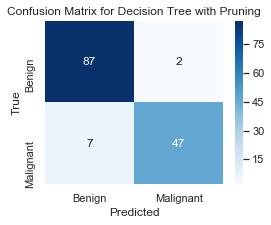

In [36]:
#plot of confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4,3))
cm =confusion_matrix(y_test_p, clf_fs_p.predict(X_test_p))
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Benign', 'Malignant'], 
            yticklabels = ['Benign', 'Malignant'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix for Decision Tree with Pruning");

In [62]:
#plot of decision tree after prunning
import os
import graphviz
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r'\library\bin\graphviz'

from IPython.display import Image
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

from sklearn.tree import DecisionTreeClassifier, tree
tree_graph_p = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth= None, 
                                     max_features= 5, min_samples_leaf= 2, min_samples_split = 2, max_leaf_nodes= 6, 
                                     random_state=0)

tree_graph_p.fit(X_train_p, y_train_p)

dot_data = export_graphviz(tree_graph_p, class_names= ['Malignant', 'Benign'], feature_names = ['radius_worst', 'radius_se', 'radius_mean', 'perimeter_worst', 'perimeter_mean','concavity_worst', 'concavity_mean', 
              'concave points_worst',  'concave points_mean', 'area_worst', 'area_mean', 'texture_worst', 'texture_mean',
              'symmetry_worst', 'smoothness_worst'],rounded=True, filled=True, out_file = None)

graph = graph_from_dot_data(dot_data)
graph.write_png('After_Pruning.png')

True

In [38]:
#Custom function to plot learning curves for tree model ----see reference page in Analysis.pdf for source----

train_sizes = [1, 100, 200, 300, 426]

from sklearn.model_selection import learning_curve

features = X_fs
target = Y_fs

def learning_curves(estimator, data, features, target, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator, features, target, train_sizes =
    train_sizes,
    cv = cv, scoring = 'neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)

    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(-1,1)


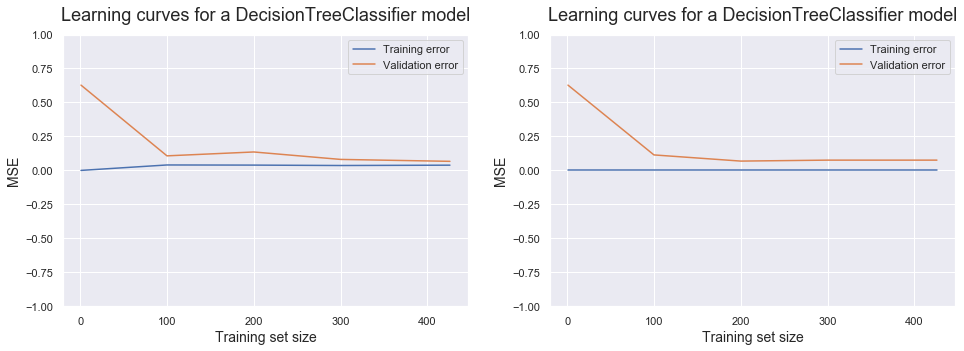

In [39]:
### Plotting the two learning curves ###

plt.figure(figsize = (16,5))

for model, i in [(DecisionTreeClassifier(criterion= 'entropy', max_depth= None, 
                                     max_features= 8, min_samples_leaf= 5, min_samples_split = 2, max_leaf_nodes= 6, 
                                     random_state=0), 1), (DecisionTreeClassifier(random_state=0),2)]:
    plt.subplot(1,2,i)
    learning_curves(model, Cancer_fs, features, target, train_sizes, 5)

        

k-Nearest Neighbors

In [40]:
from sklearn.neighbors import KNeighborsClassifier
#Find the best k value
Accuracy_training_set = []
Accuracy_testing_set = []

#find the best value for n_neighbors------between 1 and 15------
k = range(1, 15)

#running for loop to fit n_neighbors from 1 - 15
for n_neighbors in k:
    knn= KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaled, Y_train_fs)
    Accuracy_training_set.append(knn.score(X_train_scaled, Y_train_fs))
    Accuracy_testing_set.append(knn.score(X_test_scaled, Y_test_fs))
    
print('--------------- KNeighborsClassifier : classifier.fit [Done]')

--------------- KNeighborsClassifier : classifier.fit [Done]


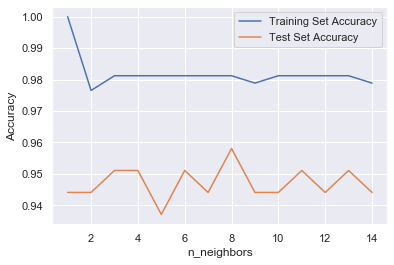

In [41]:
plt.plot(k, Accuracy_training_set, label="Training Set Accuracy")
plt.plot(k, Accuracy_testing_set, label="Test Set Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [42]:
error = []

# Calculating error for K values between 1 and 15
for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, Y_train_fs)
    pred_i = knn.predict(X_test_scaled)
    error.append(np.mean(pred_i != Y_test_fs))

print('--------------- mean error calculation [Done]')


--------------- mean error calculation [Done]


Text(0.5, 0, 'K Value')

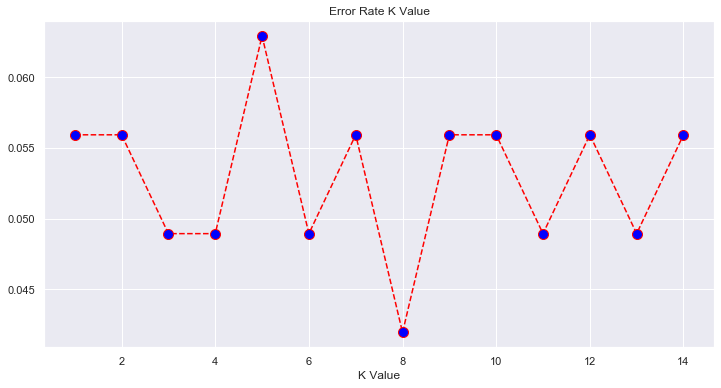

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')

In [44]:
# From the graph my above analysis the best k value is 8

# build a KNeighborsClassifier using eight neighbor
kNN = KNeighborsClassifier(n_neighbors=8)
kNN.fit(X_train_scaled, Y_train_fs)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [45]:
Y_pred_kNN = kNN.predict(X_test_scaled)

print('Misclassified examples: %d' % (Y_test_fs != Y_pred_kNN).sum())
print('Misclassification rate: %.3f' % ((Y_test_fs != Y_pred_kNN).sum()/Y_pred_kNN.sum()) + ' %')
print("Test set Accuracy: {:.3f}".format(kNN.score(X_test_scaled, Y_test_fs)))
print("Training set Accuracy: {:.3f}".format(kNN.score(X_train_scaled, Y_train_fs)))
print('--------------- KNeighborsClassifier : classifier.predict [Done]')


Misclassified examples: 6
Misclassification rate: 0.118 %
Test set Accuracy: 0.958
Training set Accuracy: 0.981
--------------- KNeighborsClassifier : classifier.predict [Done]


In [46]:

print ("----------------------> [KNeighborsClassifier]")
print(confusion_matrix(Y_test_fs,Y_pred_kNN))
print(classification_report(Y_test_fs,Y_pred_kNN))

----------------------> [KNeighborsClassifier]
[[87  1]
 [ 5 50]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        88
           1       0.98      0.91      0.94        55

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



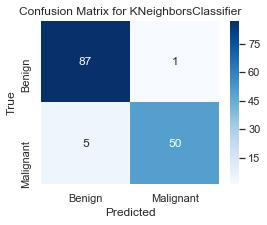

In [47]:
#plot of confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4,3))
cm =confusion_matrix(Y_test_fs, kNN.predict(X_test_scaled))
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Benign', 'Malignant'], 
            yticklabels = ['Benign', 'Malignant'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix for KNeighborsClassifier");

## Naïve Bayes Algorithm

In [48]:
##################################### [GaussianNB]
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_scaled, Y_train_fs)

print('--------------- GaussianNB : classifier.fit [Done]')


--------------- GaussianNB : classifier.fit [Done]


In [49]:
Y_pred_NB = classifier.predict(X_test_scaled)

print('Misclassified examples: %d' % (Y_test_fs != Y_pred_NB).sum())
print('Misclassification rate: %.3f' % ((Y_test_fs != Y_pred_NB).sum()/Y_pred_NB.sum()) + ' %')
print("Test set Accuracy: {:.3f}".format(classifier.score(X_test_scaled, Y_test_fs)))
print("Training set Accuracy: {:.3f}".format(classifier.score(X_train_scaled, Y_train_fs)))
print('--------------- GaussianNB : classifier.predict [Done]')


Misclassified examples: 8
Misclassification rate: 0.151 %
Test set Accuracy: 0.944
Training set Accuracy: 0.953
--------------- GaussianNB : classifier.predict [Done]


In [50]:
from sklearn.metrics import classification_report, confusion_matrix
print ("----------------------> [GaussianNB]")
print(confusion_matrix(Y_test_fs,Y_pred_NB))
print(classification_report(Y_test_fs,Y_pred_NB))


----------------------> [GaussianNB]
[[85  3]
 [ 5 50]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        88
           1       0.94      0.91      0.93        55

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



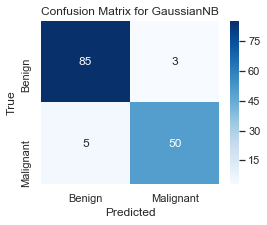

In [51]:
#plot of confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4,3))
cm =confusion_matrix(Y_test_fs, classifier.predict(X_test_scaled))
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Benign', 'Malignant'], 
            yticklabels = ['Benign', 'Malignant'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix for GaussianNB");

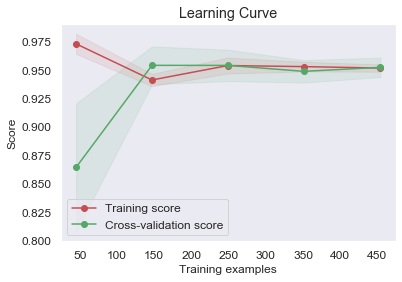

In [52]:
import scikitplot as skplt
NB = GaussianNB()
X = X_fs
y = Y_fs
cv = 5
skplt.estimators.plot_learning_curve(NB, X, y, cv=cv)

plt.show()

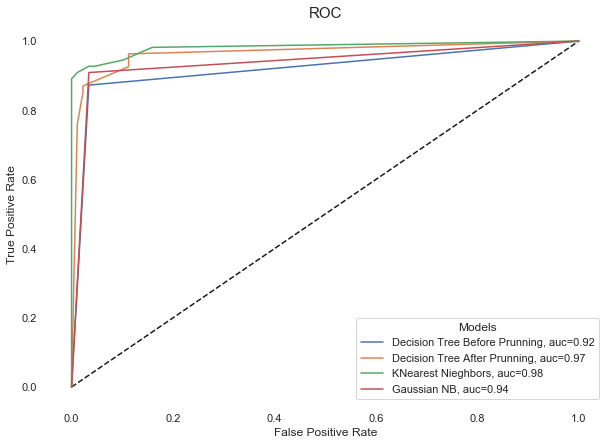

In [53]:
# false positive rate,fpr= FP/(TN+FP) OR fpr=1-specificty, tpr=sensitivity 
import sklearn.metrics as metrics

y_pred_DT_BP = clf_fs.predict_proba(X_test_scaled)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(Y_test_fs,  y_pred_DT_BP)
auc1 = metrics.roc_auc_score(Y_test_fs, y_pred_DT_BP)

y_pred_DT_AP = clf_fs_p.predict_proba(X_test_p)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test_p,  y_pred_DT_AP)
auc2 = metrics.roc_auc_score(y_test_p,y_pred_DT_AP)

y_pred_DT_kNN =  kNN.predict_proba(X_test_scaled)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(Y_test_fs,  y_pred_DT_kNN)
auc3 = metrics.roc_auc_score(Y_test_fs, y_pred_DT_kNN)

y_pred_DT_NB = classifier.fit(X_train_scaled, Y_train_fs).predict(X_test_scaled)
fpr4, tpr4, _ = metrics.roc_curve(Y_test_fs,  y_pred_DT_NB)
auc4 = metrics.roc_auc_score(Y_test_fs, y_pred_DT_NB)

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Decision Tree Before Prunning, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="Decision Tree After Prunning, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="KNearest Nieghbors, auc="+str(round(auc3,2)))
plt.plot(fpr4,tpr4,label="Gaussian NB, auc="+str(round(auc4,2)))

plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);